**Deep Fake:**

Introduction: Deepfake Al is a type of artificial intelligence used to create convincing images, audio and video hoaxes. The term describes both the technology and the resulting bogus content and is a portmanteau of deep learning and fake. Deepfakes often transform existing source content where one person is swapped for another. They also create entirely original content where someone is represented doing or saying something they didn't do or say. The greatest danger posed by deepfakes is their ability to spread false information that appears to come from trusted sources.

Task: Create a classifier that can distinguish between real and fake images.

Data Link: https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images

In [2]:
import torch
torch.cuda.is_available()

True

In [1]:
from datasets import load_dataset

# load the custom dataset
ds = load_dataset("imagefolder", data_dir="C:/PROJECTS 2024/VIKAS UCM/part/part")
ds

Resolving data files:   0%|          | 0/28000 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/6000 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/5428 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 28000
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 6000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 5428
    })
})

In [2]:
labels = ds["train"].features["label"]
labels

ClassLabel(names=['Fake', 'Real'], id=None)

In [3]:
import random
import matplotlib.pyplot as plt

def show_image_grid(dataset, split, grid_size=(4,4)):
    # Select random images from the given split
    indices = random.sample(range(len(dataset[split])), grid_size[0]*grid_size[1])
    images = [dataset[split][i]["image"] for i in indices]
    labels = [dataset[split][i]["label"] for i in indices]

    # Display the images in a grid
    fig, axes = plt.subplots(nrows=grid_size[0], ncols=grid_size[1], figsize=(8,8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.axis('off')
        ax.set_title(ds["train"].features["label"].int2str(labels[i]))

    plt.show()

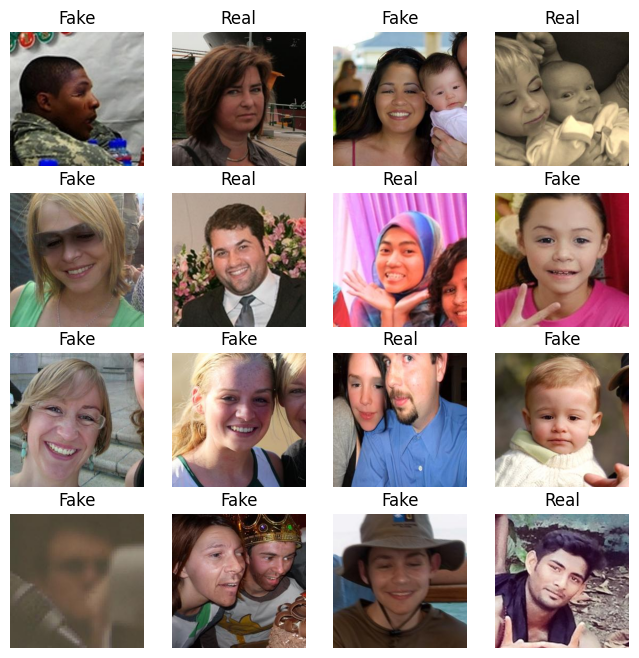

In [4]:
show_image_grid(ds, "train")

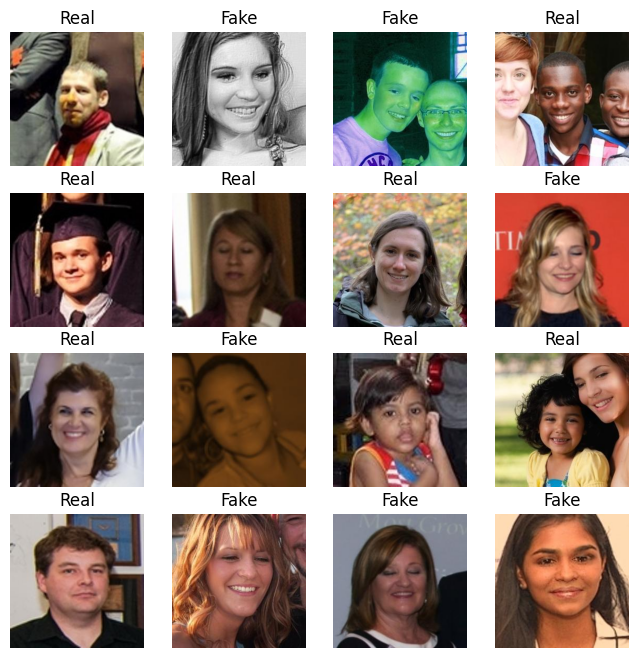

In [5]:
show_image_grid(ds, "test")

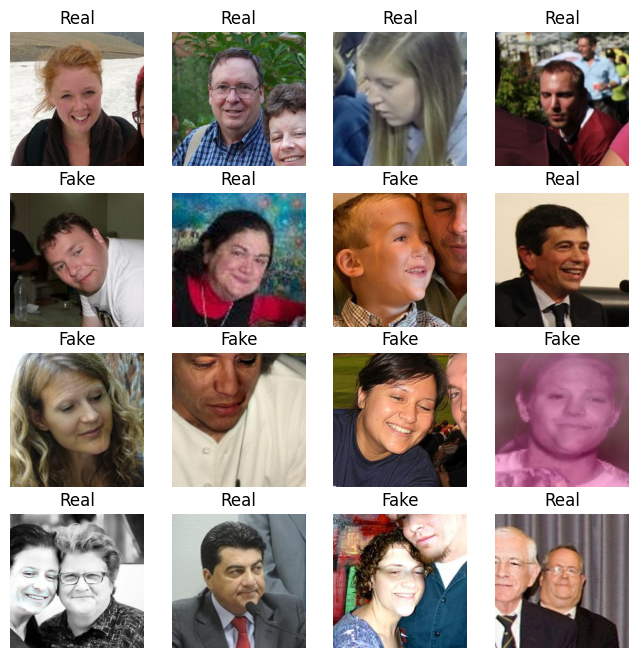

In [6]:
show_image_grid(ds, "validation")

In [7]:
import requests
import torch
from PIL import Image
from transformers import *
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

# the model name
model_name = "google/vit-base-patch16-224"
# load the image processor
image_processor = ViTImageProcessor.from_pretrained(model_name)
# loading the pre-trained model
model = ViTForImageClassification.from_pretrained(model_name)

C:\Users\venka\AppData\Roaming\Python\Python39\site-packages\transformers\deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

C:\Users\venka\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\venka\.cache\huggingface\hub\models--google--vit-base-patch16-224. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
loading configuration file preprocessor_config.json from cache at C:\Users\venka\.c

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

loading configuration file config.json from cache at C:\Users\venka\.cache\huggingface\hub\models--google--vit-base-patch16-224\snapshots\3f49326eb077187dfe1c2a2bb15fbd74e6ab91e3\config.json
Model config ViTConfig {
  "_name_or_path": "google/vit-base-patch16-224",
  "architectures": [
    "ViTForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "tench, Tinca tinca",
    "1": "goldfish, Carassius auratus",
    "2": "great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias",
    "3": "tiger shark, Galeocerdo cuvieri",
    "4": "hammerhead, hammerhead shark",
    "5": "electric ray, crampfish, numbfish, torpedo",
    "6": "stingray",
    "7": "cock",
    "8": "hen",
    "9": "ostrich, Struthio camelus",
    "10": "brambling, Fringilla montifringilla",
    "11": "goldfinch, Carduelis carduelis",
    "12": "house finch, linne

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

loading weights file model.safetensors from cache at C:\Users\venka\.cache\huggingface\hub\models--google--vit-base-patch16-224\snapshots\3f49326eb077187dfe1c2a2bb15fbd74e6ab91e3\model.safetensors
All model checkpoint weights were used when initializing ViTForImageClassification.

All the weights of ViTForImageClassification were initialized from the model checkpoint at google/vit-base-patch16-224.
If your task is similar to the task the model of the checkpoint was trained on, you can already use ViTForImageClassification for predictions without further training.


In [8]:
def transform(examples):
  # convert all images to RGB format, then preprocessing it
  # using our image processor
  inputs = image_processor([img.convert("RGB") for img in examples["image"]], return_tensors="pt")
  # we also shouldn't forget about the labels
  inputs["labels"] = examples["label"]
  return inputs

# use the with_transform() method to apply the transform to the dataset on the fly during training
dataset = ds.with_transform(transform)

In [9]:
for item in dataset["train"]:
  print(item["pixel_values"].shape)
  print(item["labels"])
  break

torch.Size([3, 224, 224])
0


In [10]:
# extract the labels for our dataset
labels = ds["train"].features["label"].names
labels

['Fake', 'Real']

In [11]:
def collate_fn(batch):
  return {
      "pixel_values": torch.stack([x["pixel_values"] for x in batch]),
      "labels": torch.tensor([x["labels"] for x in batch]),
  }

In [12]:
from evaluate import load
import numpy as np

# load the accuracy and f1 metrics from the evaluate module
accuracy = load("accuracy")
f1 = load("f1")

def compute_metrics(eval_pred):
  # compute the accuracy and f1 scores & return them
  accuracy_score = accuracy.compute(predictions=np.argmax(eval_pred.predictions, axis=1), references=eval_pred.label_ids)
  f1_score = f1.compute(predictions=np.argmax(eval_pred.predictions, axis=1), references=eval_pred.label_ids, average="macro")
  return {**accuracy_score, **f1_score}

In [13]:
# load the ViT model
model = ViTForImageClassification.from_pretrained(
    model_name,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)},
    ignore_mismatched_sizes=True,
)

loading configuration file config.json from cache at C:\Users\venka\.cache\huggingface\hub\models--google--vit-base-patch16-224\snapshots\3f49326eb077187dfe1c2a2bb15fbd74e6ab91e3\config.json
Model config ViTConfig {
  "_name_or_path": "google/vit-base-patch16-224",
  "architectures": [
    "ViTForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "Fake",
    "1": "Real"
  },
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Fake": "0",
    "Real": "1"
  },
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.40.0"
}

loading weights file model.safetensors from cache at C:\Users\venka\.cache\huggingface\hub\models--google--vit-base-patch16-224\snapshots\3f49326

In [14]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-base-deepfake", # output directory
  # output_dir="./vit-base-skin-cancer",
  per_device_train_batch_size=32, # batch size per device during training
  evaluation_strategy="steps",    # evaluation strategy to adopt during training
  num_train_epochs=3,             # total number of training epochs
  # fp16=True,                    # use mixed precision
  save_steps=1000,                # number of update steps before saving checkpoint
  eval_steps=1000,                # number of update steps before evaluating
  logging_steps=1000,             # number of update steps before logging
  # save_steps=50,
  # eval_steps=50,
  # logging_steps=50,
  save_total_limit=2,             # limit the total amount of checkpoints on disk
  remove_unused_columns=False,    # remove unused columns from the dataset
  push_to_hub=False,              # do not push the model to the hub
  report_to='tensorboard',        # report metrics to tensorboard
  load_best_model_at_end=True,    # load the best model at the end of training
)


PyTorch: setting up devices


In [15]:
from transformers import Trainer

trainer = Trainer(
    model=model,                        # the instantiated 🤗 Transformers model to be trained
    args=training_args,                 # training arguments, defined above
    data_collator=collate_fn,           # the data collator that will be used for batching
    compute_metrics=compute_metrics,    # the metrics function that will be used for evaluation
    train_dataset=dataset["train"],     # training dataset
    eval_dataset=dataset["validation"], # evaluation dataset
    tokenizer=image_processor,          # the processor that will be used for preprocessing the images
)

In [16]:
# start training
trainer.train()

***** Running training *****
  Num examples = 28,000
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 2,625
  Number of trainable parameters = 85,800,194


Step,Training Loss,Validation Loss,Accuracy,F1
1000,0.109100,0.040922,0.986000,0.986000
2000,0.014100,0.051618,0.986333,0.986332


***** Running Evaluation *****
  Num examples = 6000
  Batch size = 8
Saving model checkpoint to ./vit-base-deepfake\checkpoint-1000
Configuration saved in ./vit-base-deepfake\checkpoint-1000\config.json
Model weights saved in ./vit-base-deepfake\checkpoint-1000\model.safetensors
Image processor saved in ./vit-base-deepfake\checkpoint-1000\preprocessor_config.json
***** Running Evaluation *****
  Num examples = 6000
  Batch size = 8
Saving model checkpoint to ./vit-base-deepfake\checkpoint-2000
Configuration saved in ./vit-base-deepfake\checkpoint-2000\config.json
Model weights saved in ./vit-base-deepfake\checkpoint-2000\model.safetensors
Image processor saved in ./vit-base-deepfake\checkpoint-2000\preprocessor_config.json


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./vit-base-deepfake\checkpoint-1000 (score: 0.04092220962047577).


TrainOutput(global_step=2625, training_loss=0.04760322439102899, metrics={'train_runtime': 2226.2145, 'train_samples_per_second': 37.732, 'train_steps_per_second': 1.179, 'total_flos': 6.509327127625728e+18, 'train_loss': 0.04760322439102899, 'epoch': 3.0})

In [17]:
trainer.evaluate(dataset["test"])

***** Running Evaluation *****
  Num examples = 5428
  Batch size = 8


{'eval_loss': 0.04661477729678154,
 'eval_accuracy': 0.9863669859985261,
 'eval_f1': 0.9863615867703942,
 'eval_runtime': 59.4295,
 'eval_samples_per_second': 91.335,
 'eval_steps_per_second': 11.425,
 'epoch': 3.0}

In [18]:
# load the best model, change the checkpoint number to the best checkpoint
# if the last checkpoint is the best, then ignore this cell
best_checkpoint = 2000
# best_checkpoint = 150
model = ViTForImageClassification.from_pretrained(f"./vit-base-deepfake/checkpoint-{best_checkpoint}").to(device)
# model = ViTForImageClassification.from_pretrained(f"./vit-base-skin-cancer/checkpoint-{best_checkpoint}").to(device)

loading configuration file ./vit-base-deepfake/checkpoint-2000\config.json
Model config ViTConfig {
  "_name_or_path": "google/vit-base-patch16-224",
  "architectures": [
    "ViTForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "Fake",
    "1": "Real"
  },
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Fake": "0",
    "Real": "1"
  },
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "problem_type": "single_label_classification",
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.40.0"
}

loading weights file ./vit-base-deepfake/checkpoint-2000\model.safetensors
All model checkpoint weights were used when initializing ViTForImageClassification.

All the weights of ViTFo

In [24]:
import urllib.parse as parse
import os

# a function to determine whether a string is a URL or not
def is_url(string):
    try:
        result = parse.urlparse(string)
        return all([result.scheme, result.netloc, result.path])
    except:
        return False
    
# a function to load an image
def load_image(image_path):
    if is_url(image_path):
        return Image.open(requests.get(image_path, stream=True).raw)
    elif os.path.exists(image_path):
        return Image.open(image_path)

In [25]:
def get_prediction(model, url_or_path):
  # load the image
  img = load_image(url_or_path)
  # preprocessing the image
  pixel_values = image_processor(img, return_tensors="pt")["pixel_values"].to(device)
  # perform inference
  output = model(pixel_values)
  # get the label id and return the class name
  return model.config.id2label[int(output.logits.softmax(dim=1).argmax())]

In [26]:
get_prediction(model, "C:/PROJECTS 2024/VIKAS UCM/part/part/test/Fake/fake_3.jpg")

'Fake'

# BASIC CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define paths
train_folder = '/content/drive/MyDrive/project1/part/train'
valid_folder = '/content/drive/MyDrive/project1/part/valid'
test_folder = '/content/drive/MyDrive/project1/part/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(255, 255),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    valid_folder,
    target_size=(255, 255),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(255, 255),
    batch_size=32,
    class_mode='binary'
)

Found 28000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.
Found 5428 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
IMAGE_SIZE = (255, 255)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 2

# # Define directories
# train_dir = '/content/drive/MyDrive/project1/Dataset/Train'
# validation_dir = '/content/drive/MyDrive/project1/Dataset/Validation'
# test_dir = '/content/drive/MyDrive/project1/Dataset/Test'

# Preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    valid_folder,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') # 1 output neuron for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)


Found 28000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.
Epoch 1/10
875/875 [==============================] - 403s 443ms/step - loss: 0.5276 - accuracy: 0.7437 - val_loss: 0.4382 - val_accuracy: 0.7981
Epoch 2/10
875/875 [==============================] - 199s 227ms/step - loss: 0.4001 - accuracy: 0.8179 - val_loss: 0.3750 - val_accuracy: 0.8359
Epoch 3/10
875/875 [==============================] - 184s 211ms/step - loss: 0.3239 - accuracy: 0.8575 - val_loss: 0.3307 - val_accuracy: 0.8526
Epoch 4/10
875/875 [==============================] - 197s 225ms/step - loss: 0.2443 - accuracy: 0.8971 - val_loss: 0.3283 - val_accuracy: 0.8710
Epoch 5/10
875/875 [==============================] - 185s 211ms/step - loss: 0.1666 - accuracy: 0.9333 - val_loss: 0.3506 - val_accuracy: 0.8676
Epoch 6/10
875/875 [==============================] - 192s 220ms/step - loss: 0.1066 - accuracy: 0.9606 - val_loss: 0.4351 - val_accuracy: 0.8645
Epoch 7/10
875/875 [===================

In [ ]:
model.save('deep_fake_model')

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('deep_fake_model')

# 3. Test the model with a given image
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((255, 255))  # Assuming your model expects input of size 224x224
    img = np.array(img) / 255.0  # Normalize pixel values
    return img.reshape(1, 255, 255, 3)  # Reshape for model input (assuming it's RGB)

image_path = '/content/drive/MyDrive/project1/part/test/Real/real_10003.jpg'  # Path to your test image
preprocessed_image = preprocess_image(image_path)
prediction = loaded_model.predict(preprocessed_image)

# Assuming your model predicts classes, you might want to decode the prediction
# For example, if your model is a classifier and predicts class probabilities
predicted_class = np.argmax(prediction)
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 114ms/step
Predicted class: 0
